# Code exercises

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import convolve2d
import matplotlib.animation as animation 
from matplotlib import rc
rc('animation', html = 'jshtml')
import pandas as pd



## Covariance and Correlation matrices 

Exercise 7-1.
In this exercise, you will transform the covariance matrix into a correlation matrix.
The procedure involves dividing each matrix element (that is, the covariance between
each pair of variables) by the product of the variances of those two variables.
This is implemented by pre- and postmultiplying the covariance matrix by a diagonal
matrix containing inverted standard deviations of each variable (standard deviation
is the square root of variance). The standard deviations are inverted because we
need to divide by the variances although we will multiply matrices. The reason for
pre- and postmultiplying by standard deviations is the special property of pre- and
postmultiplying by a diagonal matrix, which was explained in Exercise 5-11.
Equation 7-1 shows the formula.
Exercise 7-1. Correlation from covariance
R = SCS
C is the covariance matrix, and S is a diagonal matrix of reciprocated standard
deviations per variable (that is, the ith diagonal is 1/σi
 where σi
is the standard
deviation of variable i).
Your goal in this exercise is to compute the correlation matrix from the covariance
matrix, by translating Equation 7-1 into Python code. You can then reproduce
Figure 7-6.

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url, header = None)
data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop',
 ]

In [3]:
data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [4]:
number_data = data._get_numeric_data()

data_mat = number_data.drop(['state', 'fold'], axis = 1).values
data_mat

array([[0.19, 0.33, 0.02, ..., 0.2 , 0.32, 0.2 ],
       [0.  , 0.16, 0.12, ..., 0.45, 0.  , 0.67],
       [0.  , 0.42, 0.49, ..., 0.02, 0.  , 0.43],
       ...,
       [0.16, 0.37, 0.25, ..., 0.18, 0.91, 0.23],
       [0.08, 0.51, 0.06, ..., 0.33, 0.22, 0.19],
       [0.2 , 0.78, 0.14, ..., 0.05, 1.  , 0.48]])

In [5]:
# find correlation 
data_mean = np.mean(data_mat, axis = 0)
data_X   = data_mat - data_mean

covariance = (data_X.T @ data_X) / (data_mat.shape[0] - 1)

In [6]:
# create correlation from covariance 
data_std = 1 / np.std(data_mat, axis = 0)
S = np.diag(data_std)

correlation = S @ covariance @ S 

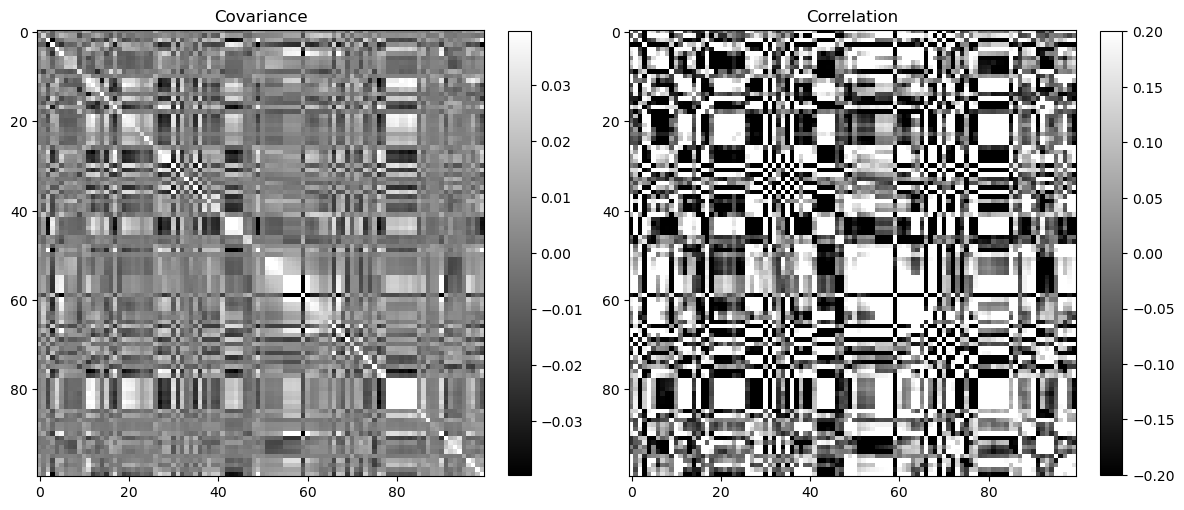

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 7))

clim_cov = np.max(np.abs(covariance)) * 0.2
clim_corr = np.max(np.abs(correlation)) * 0.2


h1 = ax[0].imshow(covariance, vmin = -clim_cov, vmax = clim_cov, cmap = 'gray')
h2 = ax[1].imshow(correlation, vmin = -clim_corr, vmax = clim_corr, cmap = 'gray')
fig.colorbar(h1, ax = ax[0], fraction = 0.045 )
fig.colorbar(h2, ax = ax[1], fraction = 0.045)
ax[0].set_title('Covariance')
ax[1].set_title('Correlation')


plt.show()

Exercise 7-2.
NumPy has a function np.corrcoef() that returns a correlation matrix, given an
input data matrix. Use this function to reproduce the correlation matrix you created
in the previous exercise. Show both matrices, and their difference, in a figure like
Figure 7-7 to confirm that they are the same.
Next, inspect the source code of np.corrcoef() by evaluating ??np.corrcoef().
NumPy uses a slightly different implementation of broadcast dividing by the standard
deviations instead of pre- and postmultiplying by a diagonal matrix of inverted
standard deviations, but you should be able to understand how their code implemen‐
tation matches the math and the Python code you wrote in the previous exercise

In [8]:
correlation_2 = np.corrcoef(data_mat.T)

diff = correlation - correlation_2

In [9]:
diff

array([[ 5.01756147e-04, -2.31552470e-05,  1.15994851e-04, ...,
         1.35652548e-04,  2.33995130e-04,  1.84223471e-04],
       [-2.31552470e-05,  5.01756147e-04, -3.36724218e-05, ...,
        -2.58432344e-05, -4.73494844e-05, -1.75226269e-05],
       [ 1.15994851e-04, -3.36724218e-05,  5.01756147e-04, ...,
         7.37696865e-05,  1.30854312e-04,  3.16740409e-04],
       ...,
       [ 1.35652548e-04, -2.58432344e-05,  7.37696865e-05, ...,
         5.01756147e-04,  1.03684861e-04,  7.71845694e-05],
       [ 2.33995130e-04, -4.73494844e-05,  1.30854312e-04, ...,
         1.03684861e-04,  5.01756147e-04,  1.74925870e-04],
       [ 1.84223471e-04, -1.75226269e-05,  3.16740409e-04, ...,
         7.71845694e-05,  1.74925870e-04,  5.01756147e-04]])

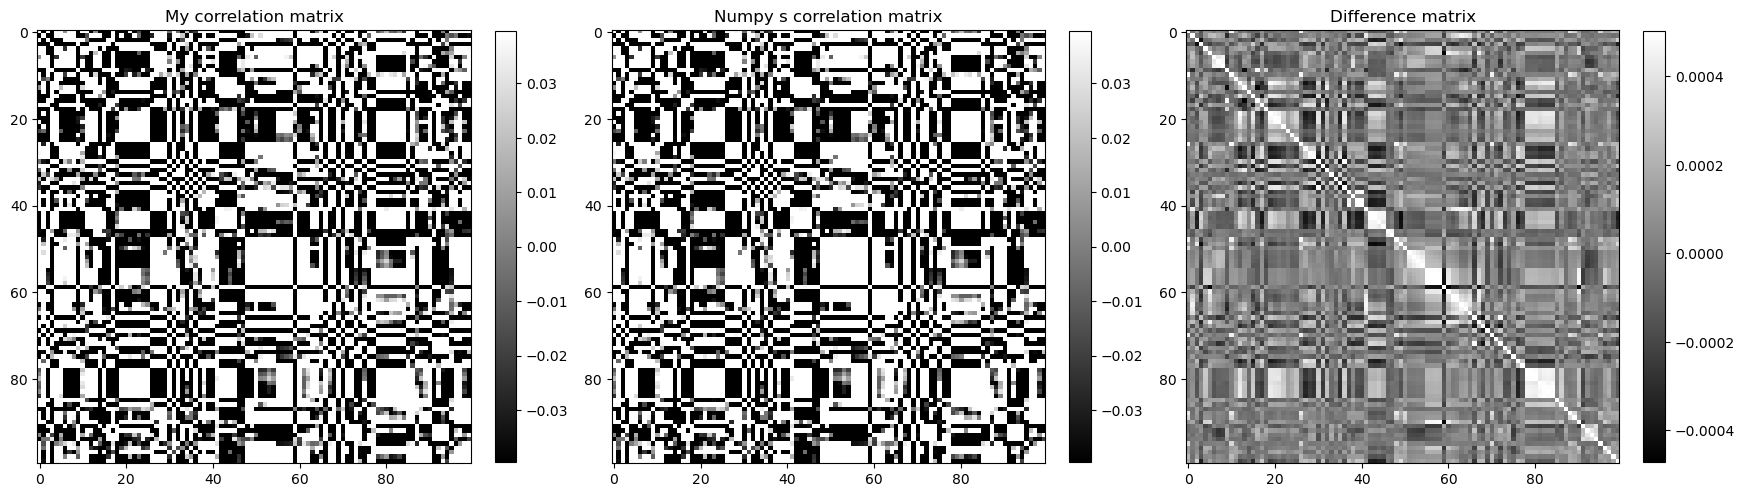

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (21, 7))

h1 = ax[0].imshow(correlation, vmin = -clim_cov, vmax = clim_cov, cmap = 'grey')
ax[0].set_title('My correlation matrix')
fig.colorbar(h1, ax= ax[0],  fraction = .045 )

h2 = ax[1].imshow(correlation_2, vmin = -clim_cov, vmax = clim_cov, cmap = 'grey')
ax[1].set_title('Numpy s correlation matrix')
fig.colorbar(h2, ax = ax[1], fraction = .045)

h3 = ax[2].imshow(diff, vmin = np.min(diff), vmax = np.max(diff), cmap = 'grey')
ax[2].set_title('Difference matrix')
fig.colorbar(h3, ax = ax[2], fraction = .045)

plt.show()

## Geometric Transformations 

Exercise 7-3.
The goal of this exercise is to show points in a circle before and after applying
a transformation, similar to how I showed the line before and after rotation in
Figure 7-2. Use the following transformation matrix and then create a graph that
looks like Figure 7-8

In [11]:
rad = np.linspace(0, 2 * np.pi, 20)

o_point = np.vstack((np.cos(rad), np.sin(rad)))

In [12]:
T = np.array([[1 , .5], [0, .5]])

rot_point = T @  o_point

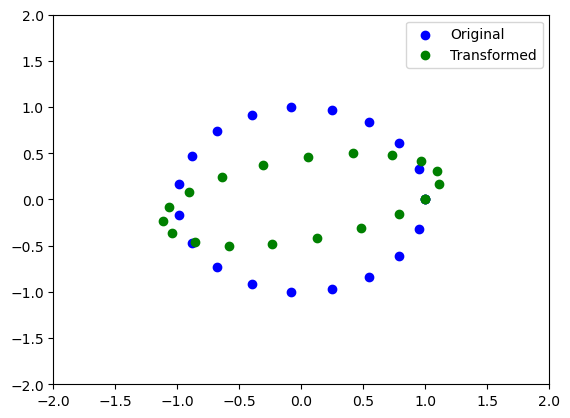

In [13]:
fig, ax = plt.subplots()

ax.scatter(o_point[0, :], o_point[1, :], color = 'blue', label = 'Original')
ax.scatter(rot_point[0, :], rot_point[1, :], color = 'green', label = 'Transformed')

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

plt.legend()
plt.show()

Exercise 7-4.
Now for another movie. I call this one The Coiling DNA. Figure 7-9 shows one
frame of the movie. The procedure is the same as for The Wobbly Circle—set up a
figure, create a Python function that applies a transformation matrix to a matrix of
coordinates, and tell matplotlib to create an animation using that function. Use the
following transformation matrix:
$$ T = \begin{vmatrix} (1 - \phi 3) & 0 \\ 0 & \phi \end{vmatrix} \\ -1 \leq \phi \leq 1 $$

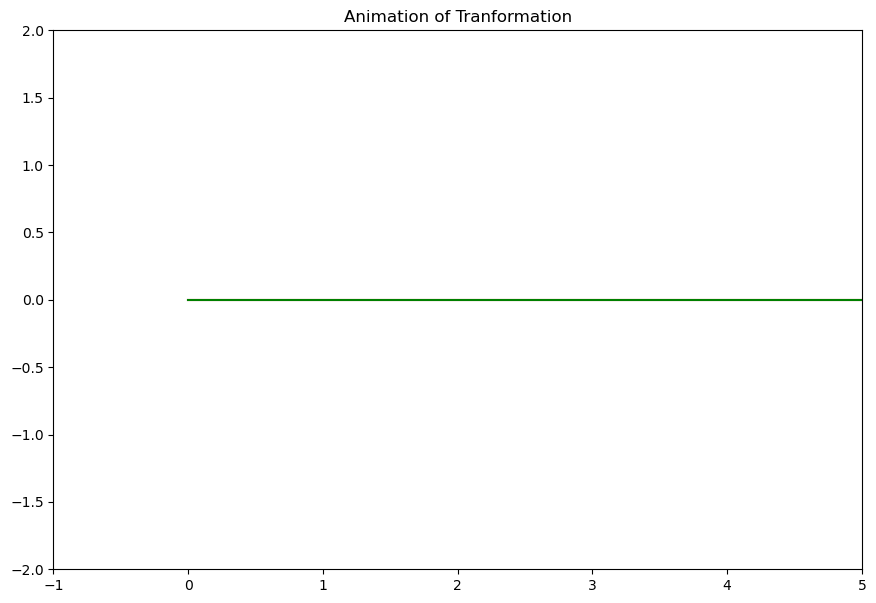

In [14]:
rad = np.linspace(0, 2 * np.pi , 200)


o_point_1 = np.vstack((rad, np.cos(rad)))
o_point_2 = np.vstack((rad, np.sin(rad)))

fig, ax = plt.subplots(1, figsize = (14, 7))

plth_1, = ax.plot(o_point_1[0, :], o_point_1[1, :], color = 'red')
plth_2, = ax.plot(o_point_2[0, :], o_point_2[1, :],  color = 'green')

def aframe(ph) : 

    T = np.array([[1 - ph / 3, 0], [0, ph]])

    p1 = T @ o_point_1
    p2 = T @ o_point_2

    plth_1.set_xdata(p1[0, :])
    plth_1.set_ydata(p1[1, :])

    plth_2.set_xdata(p2[0, :])
    plth_2.set_ydata(p2[1, :])
    return (plth_1, plth_2)

phi = np.linspace(0, 1 - 1/40, 40)

ax.set_xlim([-1, 5])
ax.set_ylim([-2, 2])
ax.set_aspect('equal')
ax.set_title('Animation of Tranformation')
animation.FuncAnimation(fig, aframe, phi, interval = 100, repeat = True)


## Image Feature Detection 

Exercise 7-5.
Smooth the 3D bathtub picture (if you need a hint, check the footnote4
).
The output of the convolve2d function has a data type float64 (you can see this
yourself by typing variableName.dtype). However, plt.imshow will give a warning
about clipping numerical values, and the picture won’t render properly. Therefore,
you’ll need to convert the result of convolution to uint8.

In [15]:
from skimage import io, color

url = 'https://upload.wikimedia.org/wikipedia/commons/1/16/16001000466804-Ume%C3%A5-Riksantikvarie%C3%A4mbetet.jpg'

img = io.imread(url)

In [16]:
img.shape

(458, 800, 3)

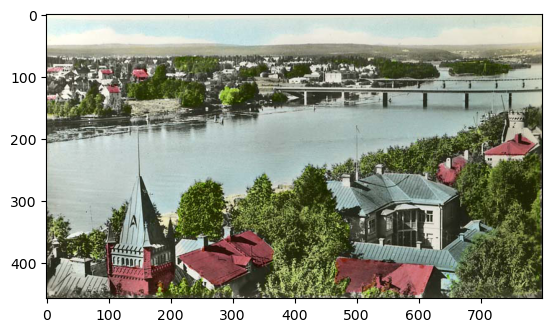

In [17]:
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()

In [18]:
# create kernel 
kernel_size = 29 
Y, X = np.meshgrid(np.linspace(-3, 3, 29), np.linspace(-3, 3, 29))

kernel = np.exp(- (X ** 2 + Y ** 2)/ 29)
kernel = kernel / np.sum(kernel)


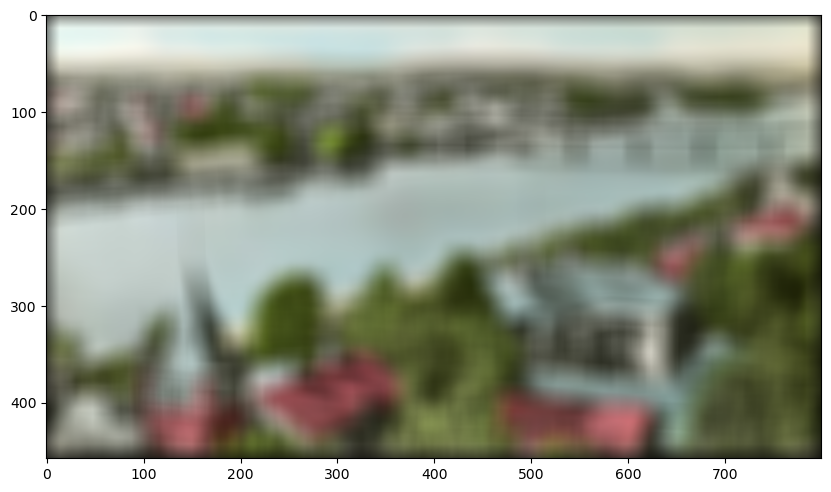

In [19]:
smooth_img = np.zeros(img.shape)
for i in range(img.shape[2]) : 
    smooth_img[:, :, i] = convolve2d(img[:, :, i], kernel, mode = 'same')

fig = plt.figure(figsize = (10, 6))
plt.imshow(smooth_img.astype(np.uint8))
plt.show()

Exercise 7-6.
You don’t need to use the same kernel for each color channel. Change the width
parameter of the Gaussian for each channel according to the values shown in Fig‐
ure 7-10. The effect on the image is subtle, but the different blurs of the different
colors give it a bit of a 3D look, as if you are looking at a red-blue anaglyph without
the glasses

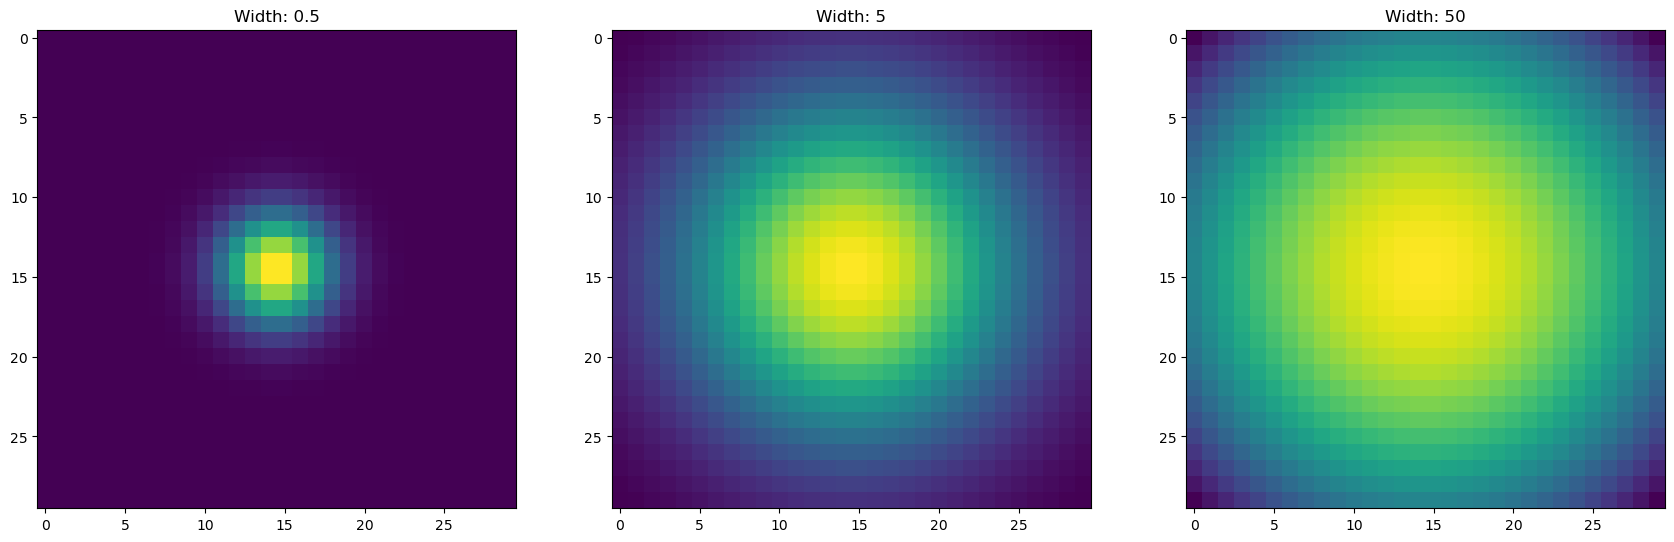

In [24]:
# new kernel 
kernel_size = 30 

Y, X = np.meshgrid(np.linspace(-3, 3, 30), np.linspace(-3, 3, 30))

width = [0.5, 5, 50]
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (21, 7))
for i in range(len(width)) : 
    kernel = np.exp(-(X**2 + Y ** 2) / width[i])
    kernel /= np.sum(kernel)
    ax[i].imshow(kernel)
    ax[i].set_title(f'Width: {width[i]}')
plt.show()

Exercise 7-7.
Technically, image smoothing is feature extraction, because it involves extracting
the smooth features of the signal while dampening the sharp features. Here we will
change the filter kernels to solve other image feature detection problems: identifying
horizontal and vertical lines.
The two kernels are shown in Figure 7-11, as are their effects on the image. You
can handcraft the two kernels based on their visual appearance; they are 3 × 3 and
comprise only the numbers −1, 0, and +1. Convolve those kernels with the 2D
grayscale picture to create the feature maps shown in Figure 7-11

In [25]:
Ver_kernel = np.array([
    [-1, 0, 1], 
    [-1, 0, 1], 
    [-1, 0, 1]
])

Hor_kernel = np.array([
    [-1, -1, -1],
    [0, 0, 0], 
    [1, 1, 1], 
])

img_2d = color.rgb2gray(img)

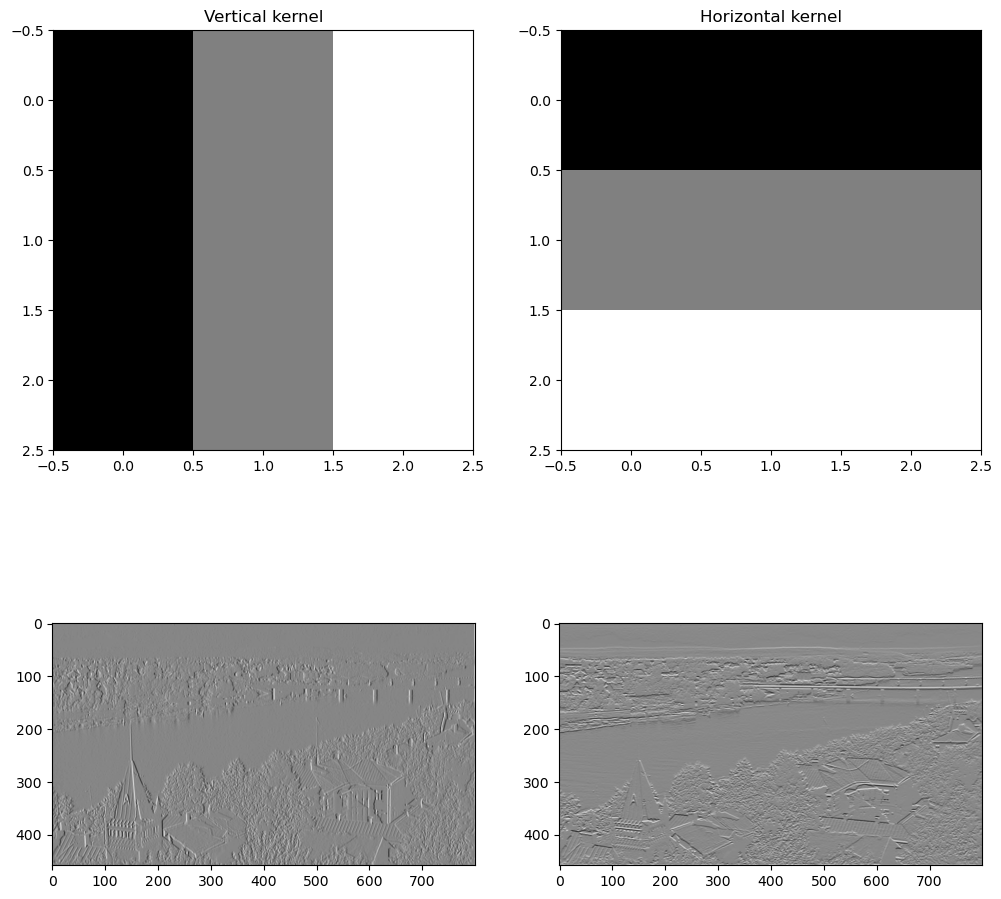

In [29]:
fig, ax = plt.subplots(nrows = 2, ncols = 2 , figsize = (12, 12))

ax[0][0].imshow(Ver_kernel, cmap = 'gray')
ax[0][0].set_title('Vertical kernel')
ax[0][1].imshow(Hor_kernel, cmap = 'gray')
ax[0][1].set_title('Horizontal kernel')

ax[1][0].imshow(convolve2d(img_2d, Ver_kernel, mode = 'same'), cmap = 'grey')

ax[1][1].imshow(convolve2d(img_2d, Hor_kernel, mode = 'same'), cmap = 'grey')

plt.show()